<a href="https://colab.research.google.com/github/marufa181/CERTIFICATE/blob/main/0112230230_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

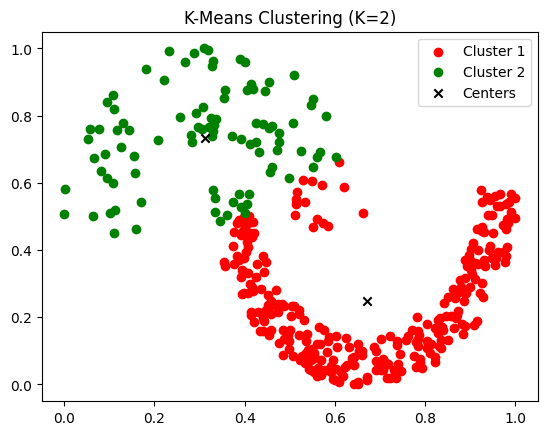

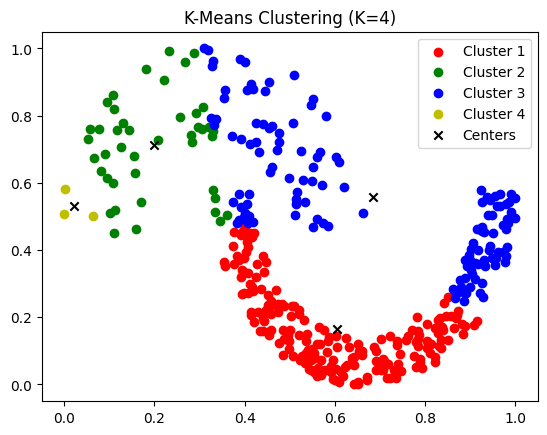

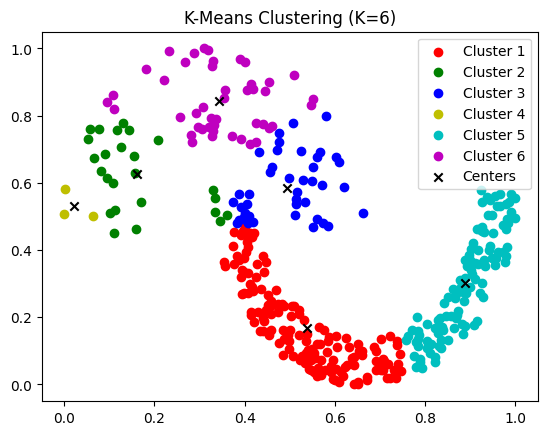

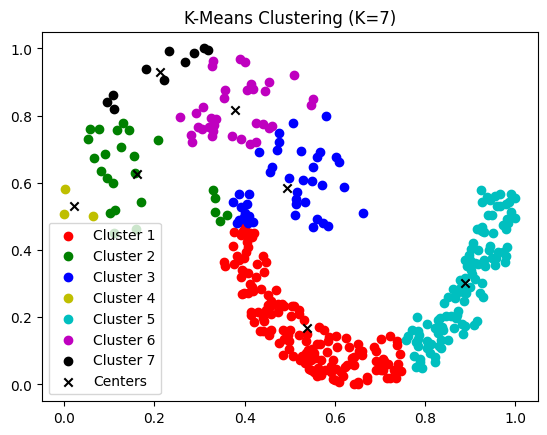

K=2, Inertia=22.82782526240866
K=4, Inertia=21.419362790472583
K=6, Inertia=9.174211494263846
K=7, Inertia=8.859991473962635


In [ ]:
import random
import math
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

def calculate_mean(points):
    return [sum(dim) / len(points) for dim in zip(*points)] if points else []

def load_dataset(filepath):
    with open(filepath, 'r') as file:
        data = [list(map(float, line.strip().split())) for line in file]
    return data

def k_means_clustering(data, K, seed):
    random.seed(seed)

    Centers = random.sample(data, K)
    Clusters = [[] for _ in range(K)]

    itr = 1
    Shift = 0

    while True:
        Temp_Clusters = [[] for _ in range(K)]
        for point in data:
            distances = [euclidean_distance(point, center) for center in Centers]
            closest_center = distances.index(min(distances))
            Temp_Clusters[closest_center].append(point)

        new_Centers = [calculate_mean(cluster) for cluster in Temp_Clusters]
        Shift = sum(
            1 for old, new in zip(Centers, new_Centers) if old != new
        )
        Centers = new_Centers
        Clusters = Temp_Clusters

        if Shift < 50:
            break
        itr += 1

    return Clusters, Centers

def plot_clusters(Clusters, Centers, K):
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
    for i, cluster in enumerate(Clusters):
        cluster_points = list(zip(*cluster))
        plt.scatter(cluster_points[0], cluster_points[1], c=colors[i % len(colors)], label=f'Cluster {i+1}')

    center_points = list(zip(*Centers))
    plt.scatter(center_points[0], center_points[1], c='black', marker='x', label='Centers')
    plt.title(f'K-Means Clustering (K={K})')
    plt.legend()
    plt.show()

def calculate_inertia(Clusters, Centers):
    inertia = 0
    for i, cluster in enumerate(Clusters):
        inertia += sum(euclidean_distance(point, Centers[i]) ** 2 for point in cluster)
    return inertia

if __name__ == "__main__":
    filepath = 'dataset.txt'
    data = load_dataset(filepath)

    seed = 123456
    inertia_values = []

    for K in [2, 4, 6, 7]:
        Clusters, Centers = k_means_clustering(data, K, seed)
        plot_clusters(Clusters, Centers, K)
        inertia = calculate_inertia(Clusters, Centers)
        inertia_values.append((K, inertia))

    for K, inertia in inertia_values:
        print(f'K={K}, Inertia={inertia}')
